In [1]:
### Importing All Important Liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
### Reading CSV file 
df = pd.read_csv("CAN_Intrusion.csv", low_memory=False)

In [3]:
### see the Top 5 rows
df.head()

,Timestamp,Message_ID,DLC,Byte_1,Byte_2,Byte_3,Byte_4,Byte_5,Byte_6,Byte_7,Byte_8,Signal_1,Signal_2,Message_Type,Target
0,Timestamp:,0.000000,ID:,0316,0,DLC:,8,05,20,ea,0a,20,1a,00,Attack_free
1,Timestamp:,0.000224,ID:,0329,0,DLC:,8,d7,a7,7f,8c,11,2f,00,Attack_free
2,Timestamp:,0.000462,ID:,0080,0,DLC:,8,00,17,ea,0a,20,1a,20,Attack_free
3,Timestamp:,0.000704,ID:,0081,0,DLC:,8,7f,84,60,00,00,00,00,Attack_free
4,Timestamp:,0.000878,ID:,0120,0,DLC:,4,00,00,00,00,NaN,NaN,NaN,Attack_free


In [4]:
### see the Bottom 5 rows
df.tail()

,Timestamp,Message_ID,DLC,Byte_1,Byte_2,Byte_3,Byte_4,Byte_5,Byte_6,Byte_7,Byte_8,Signal_1,Signal_2,Message_Type,Target
2469145,Timestamp:,1.481193e+09,ID:,02b0,0,DLC:,5,72,0,01,7.0,30,Timestamp:,1481193380.694519,Impersonation_attack
2469146,Timestamp:,1.481193e+09,ID:,02b0,0,DLC:,5,74,0,00,7.0,51,Timestamp:,1481193380.704458,Impersonation_attack
2469147,Timestamp:,1.481193e+09,ID:,02b0,0,DLC:,5,74,0,00,7.0,62,Timestamp:,1481193380.714513,Impersonation_attack
2469148,Timestamp:,1.481193e+09,ID:,05e4,0,DLC:,3,0,2,00,NaN,NaN,Timestamp:,1481193380.724453,Impersonation_attack
2469149,Timestamp:,1.481193e+09,ID:,02b0,0,DLC:,5,73,0,00,7.0,03,NaN,NaN,Impersonation_attack


In [5]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469150 entries, 0 to 2469149
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Timestamp     object 
 1   Message_ID    float64
 2   DLC           object 
 3   Byte_1        object 
 4   Byte_2        int64  
 5   Byte_3        object 
 6   Byte_4        int64  
 7   Byte_5        object 
 8   Byte_6        object 
 9   Byte_7        object 
 10  Byte_8        object 
 11  Signal_1      object 
 12  Signal_2      object 
 13  Message_Type  object 
 14  Target        object 
dtypes: float64(1), int64(2), object(12)
memory usage: 282.6+ MB
None


In [6]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
         Message_ID        Byte_2        Byte_4
count  2.469150e+06  2.469150e+06  2.469150e+06
mean   7.262181e+07  5.024604e+00  7.364328e+00
std    3.198320e+08  2.184523e+01  1.916352e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.030228e+02  0.000000e+00  8.000000e+00
50%    2.448754e+02  0.000000e+00  8.000000e+00
75%    8.202834e+02  0.000000e+00  8.000000e+00
max    1.481193e+09  1.000000e+02  8.000000e+00


In [7]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Timestamp            0
Message_ID           0
DLC                  0
Byte_1               0
Byte_2               0
Byte_3               0
Byte_4               0
Byte_5          123754
Byte_6          123754
Byte_7          132319
Byte_8           84550
Signal_1        105217
Signal_2        171139
Message_Type    171139
Target               0
dtype: int64


### **Data Cleaning**

In [8]:
# Example 1: Drop rows with any missing values
df_clean = df.dropna()

In [9]:
df_clean.isna().sum()

Timestamp       0
Message_ID      0
DLC             0
Byte_1          0
Byte_2          0
Byte_3          0
Byte_4          0
Byte_5          0
Byte_6          0
Byte_7          0
Byte_8          0
Signal_1        0
Signal_2        0
Message_Type    0
Target          0
dtype: int64

In [10]:
# # Example 2: Fill missing values with the mean or median for numerical columns
# df_clean['column_name'] = df_clean['column_name'].fillna(df_clean['column_name'].mean())

In [11]:
# Handle duplicates
df_clean = df_clean.drop_duplicates()

In [12]:
df_clean.shape

(2228012, 15)

### **Exploratory Data Analysis (EDA)**

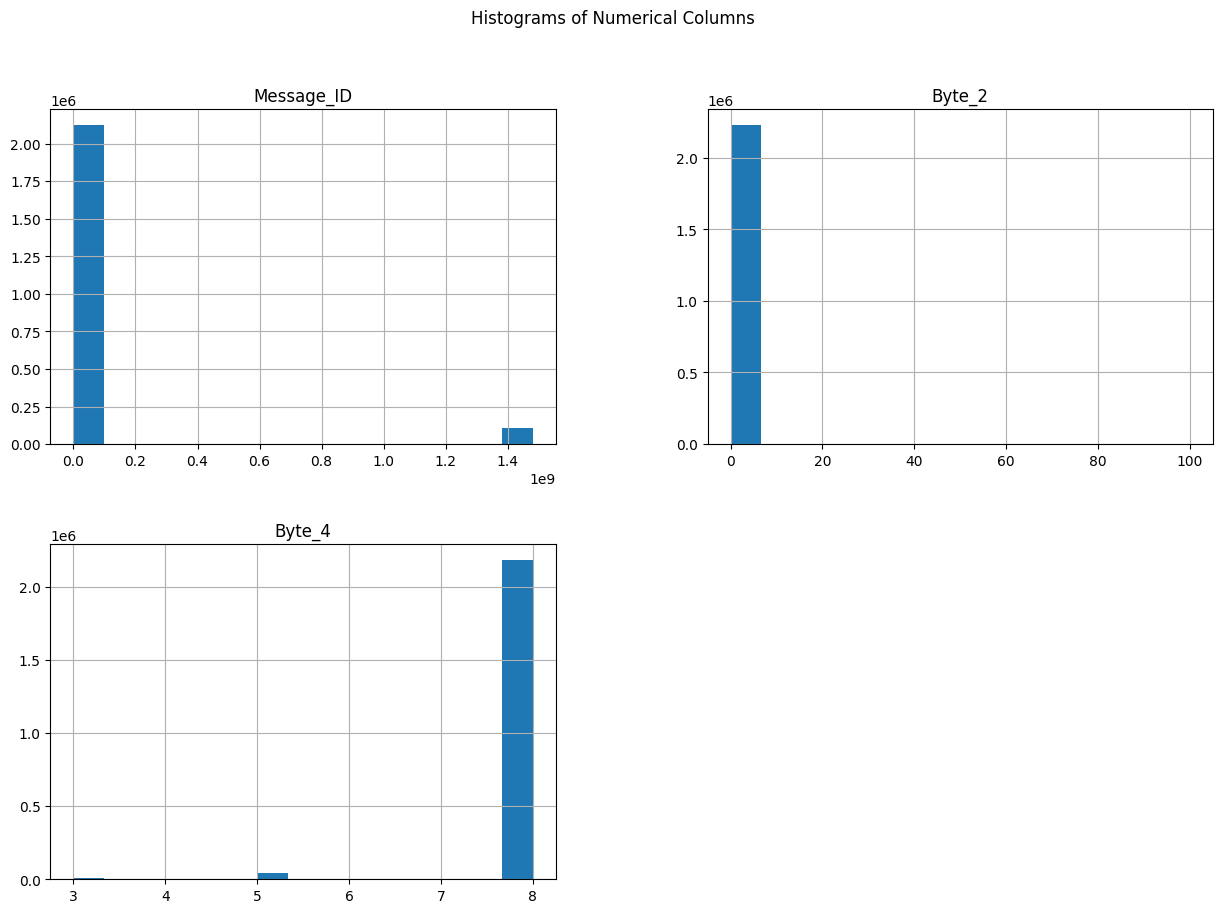

In [13]:
### Visualizing the distribution of numerical variables
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

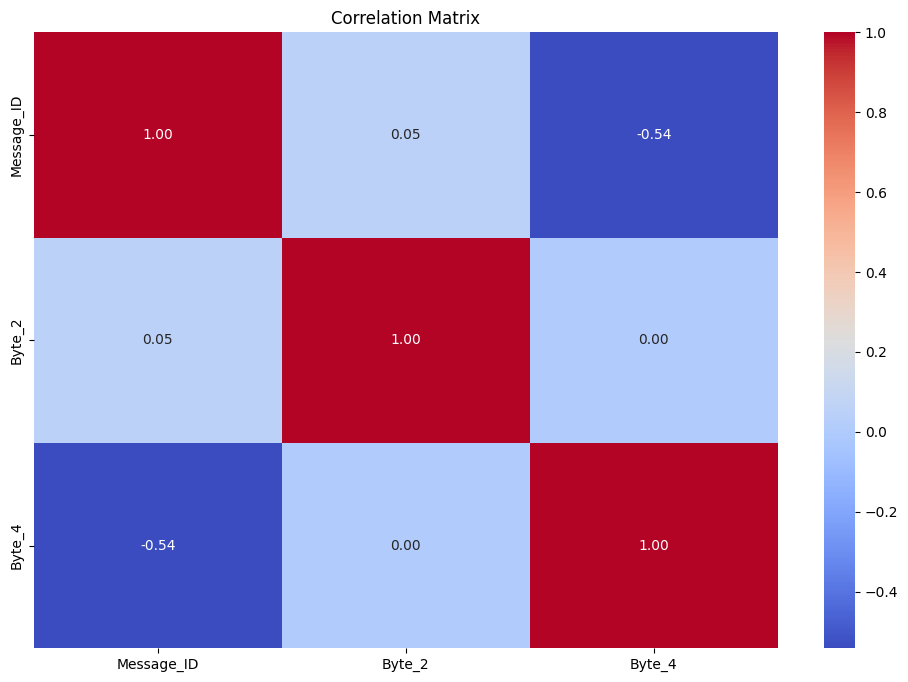

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

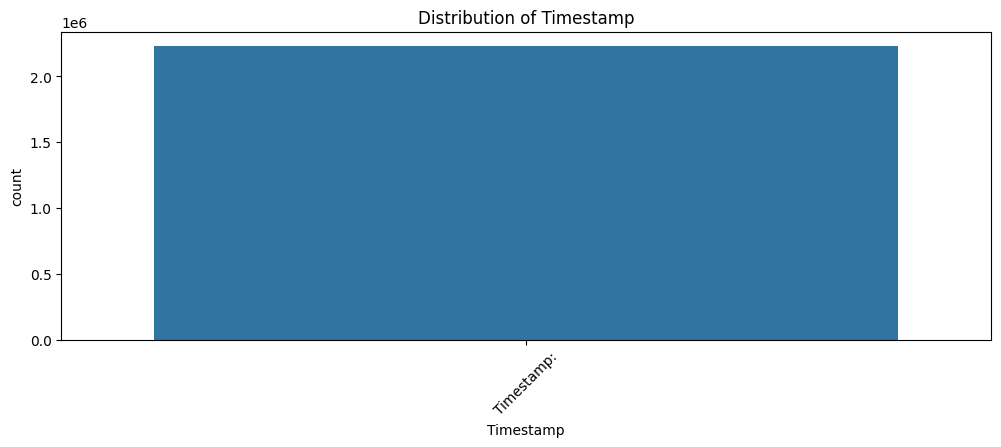

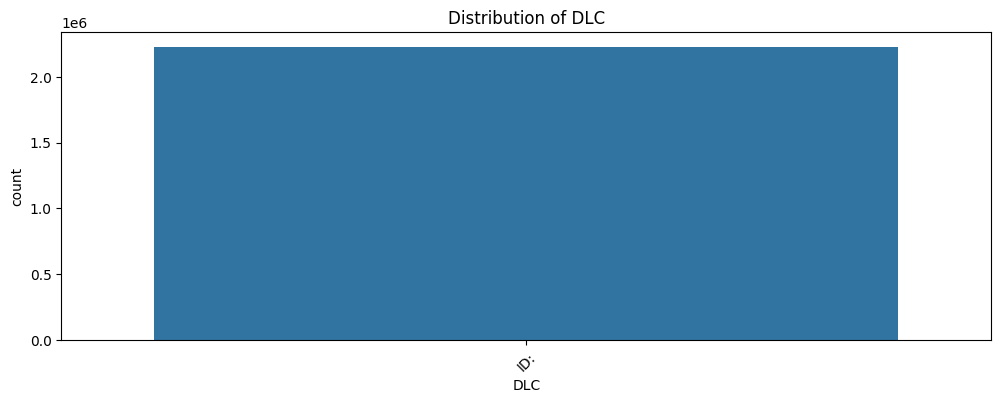

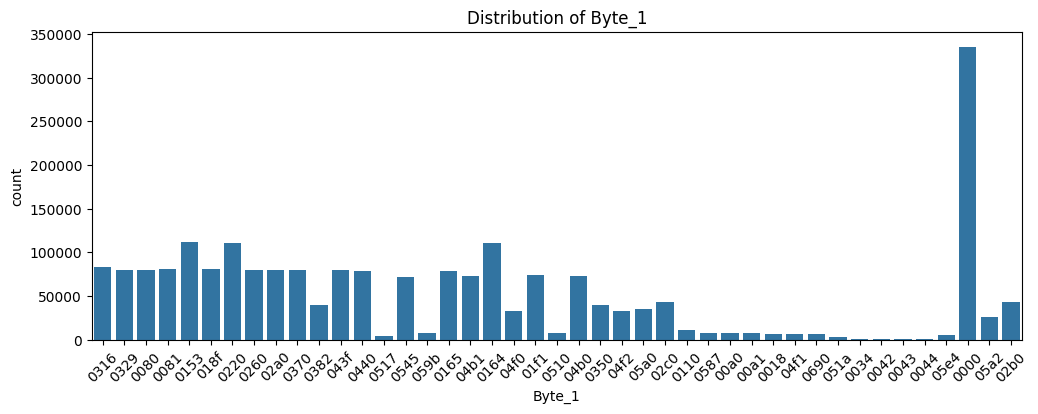

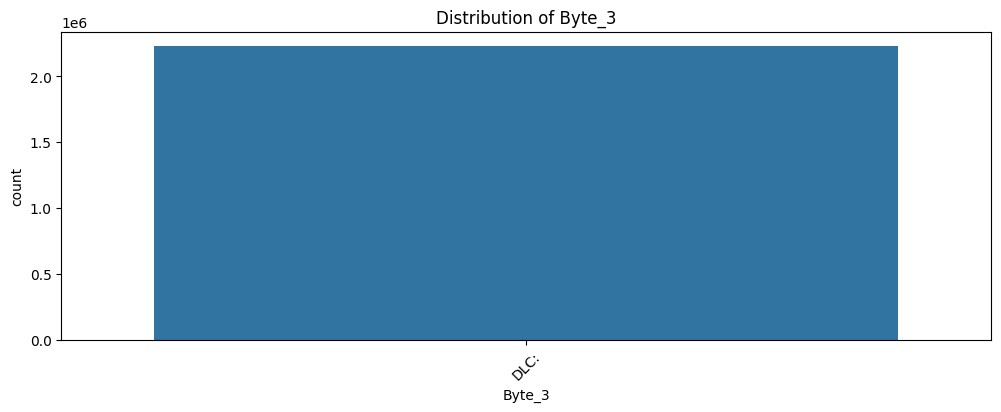

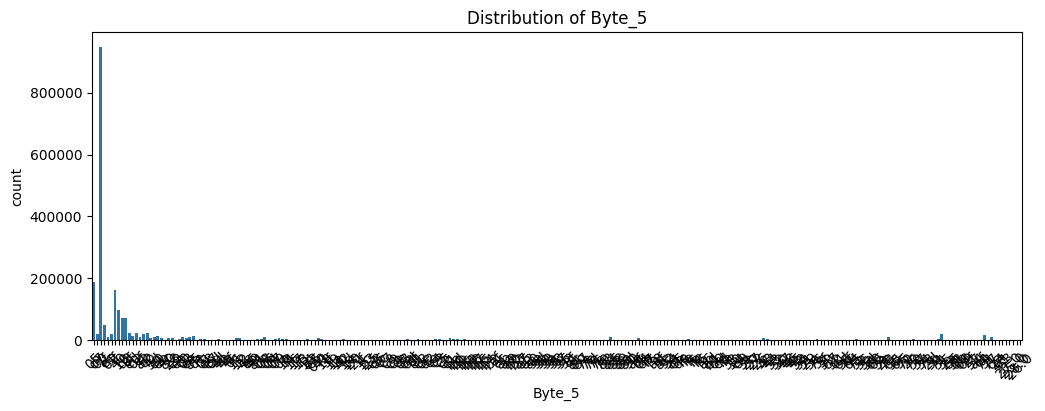

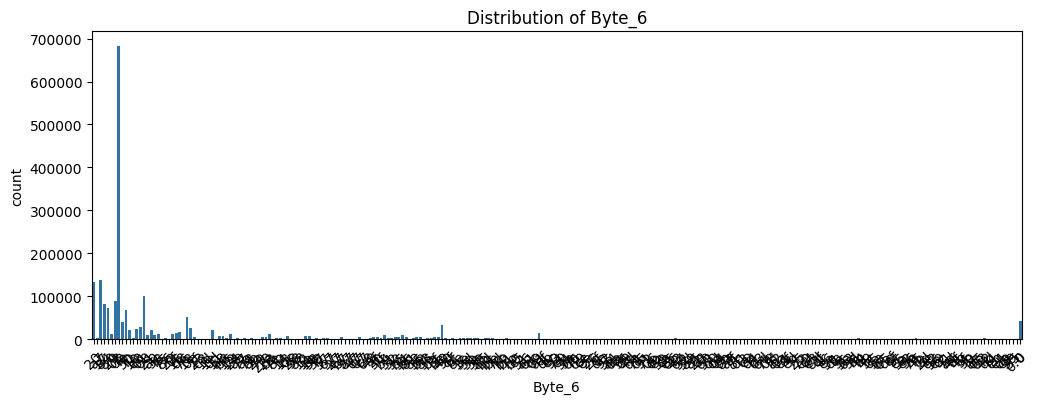

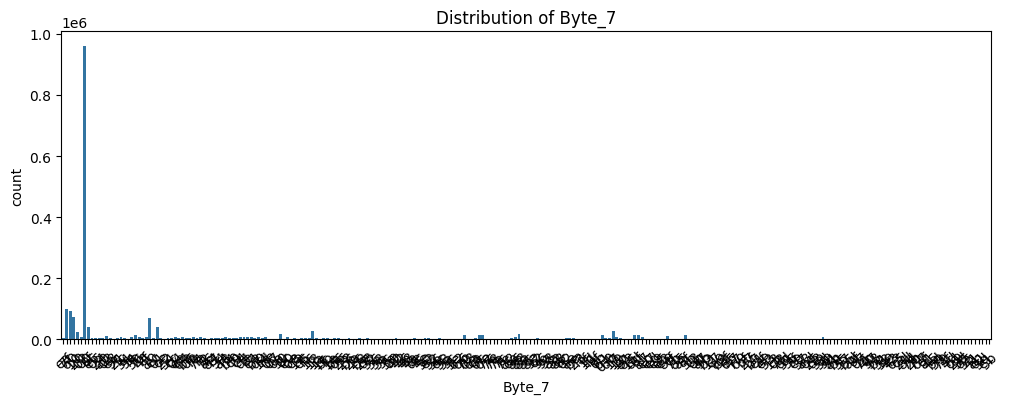

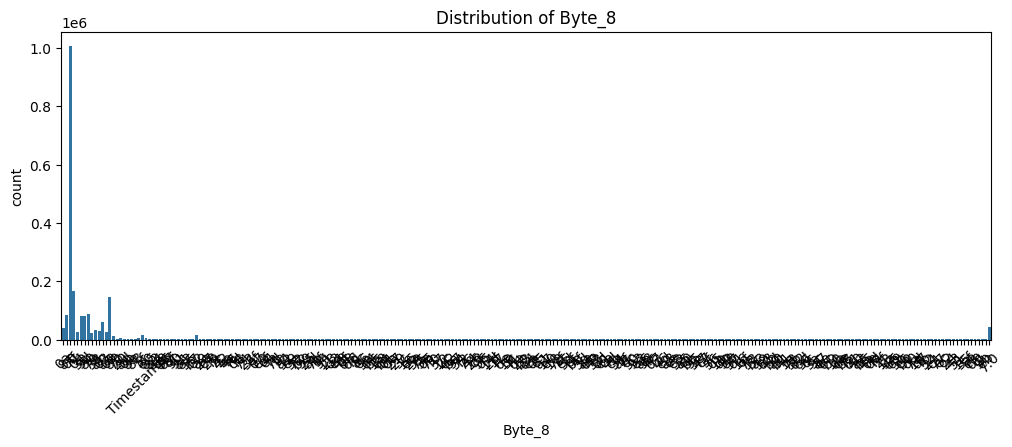

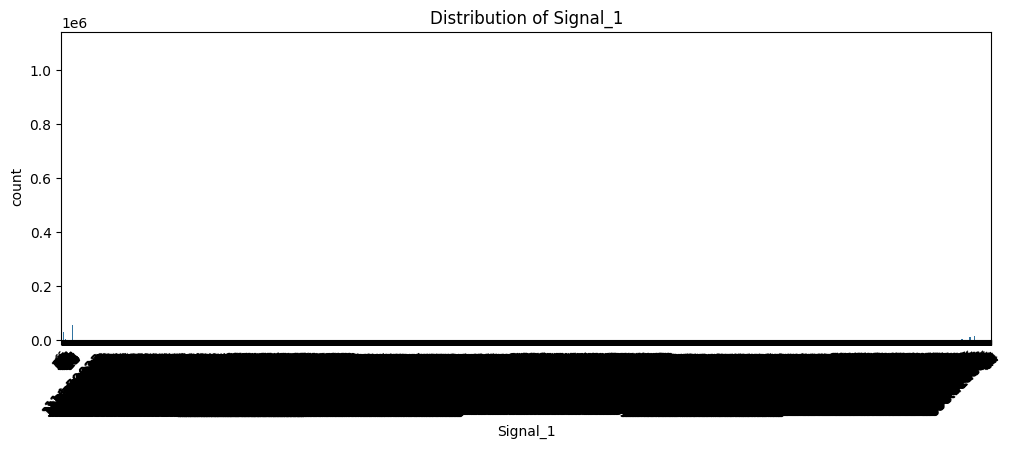

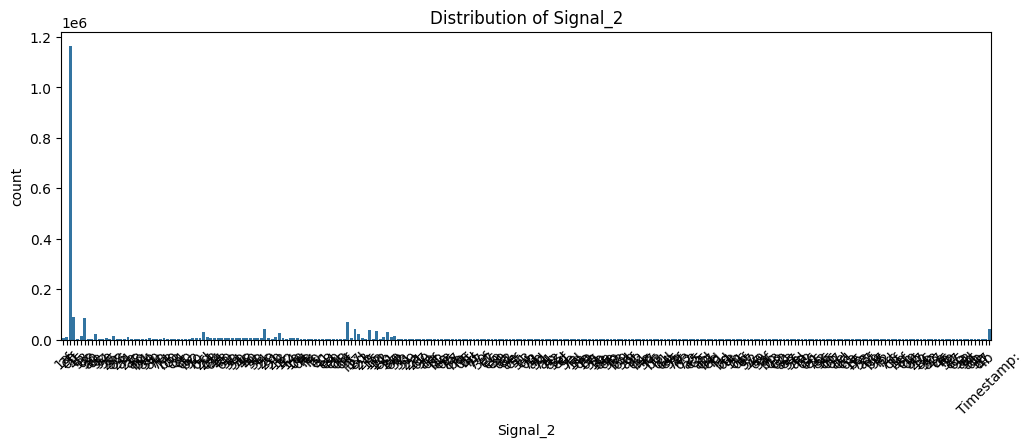

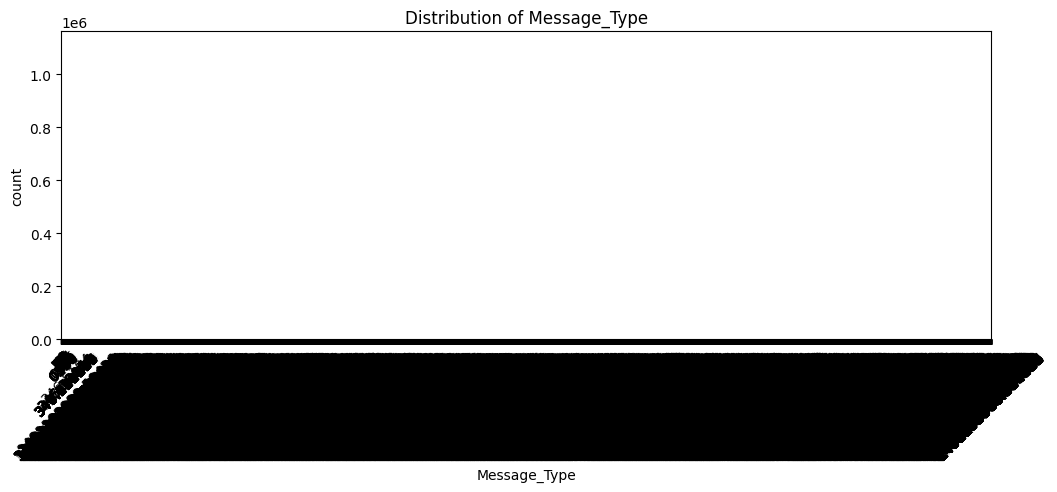

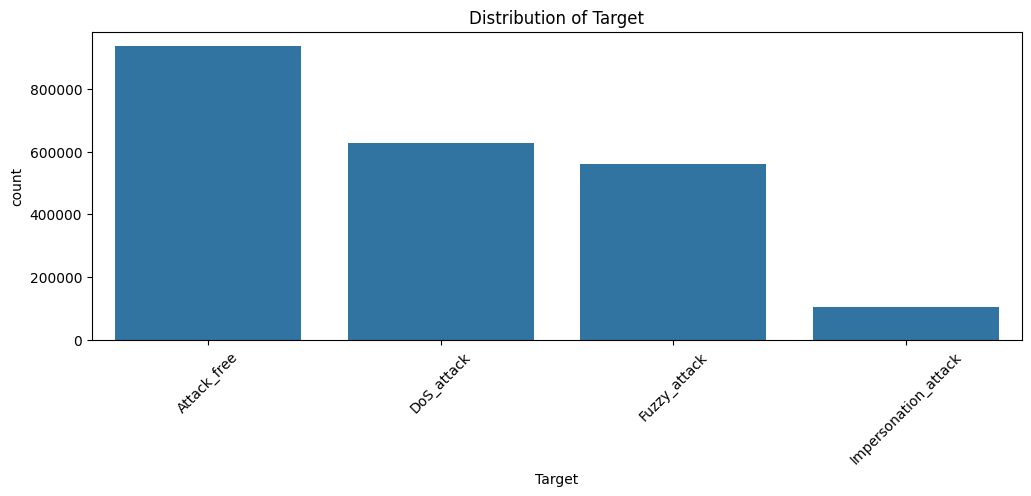

In [15]:
# Visualizing distributions of categorical variables
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=col, data=df_clean)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [13]:
df_clean.head()

,Timestamp,Message_ID,DLC,Byte_1,Byte_2,Byte_3,Byte_4,Byte_5,Byte_6,Byte_7,Byte_8,Signal_1,Signal_2,Message_Type,Target
0,Timestamp:,0.000000,ID:,0316,0,DLC:,8,05,20,ea,0a,20,1a,00,Attack_free
1,Timestamp:,0.000224,ID:,0329,0,DLC:,8,d7,a7,7f,8c,11,2f,00,Attack_free
2,Timestamp:,0.000462,ID:,0080,0,DLC:,8,00,17,ea,0a,20,1a,20,Attack_free
3,Timestamp:,0.000704,ID:,0081,0,DLC:,8,7f,84,60,00,00,00,00,Attack_free
5,Timestamp:,0.001115,ID:,0153,0,DLC:,8,00,80,10,ff,00,ff,40,Attack_free


In [14]:
df_clean["DLC"].value_counts()

DLC
ID:    2228012
Name: count, dtype: int64

In [15]:
df_clean["Byte_3"].value_counts()

Byte_3
DLC:    2228012
Name: count, dtype: int64

In [16]:
df_clean.drop(["Signal_1","Message_Type"],axis=1, inplace=True)

In [17]:
df_clean.drop(["DLC","Byte_3","Timestamp"],axis=1, inplace=True)
df_clean.head()

,Message_ID,Byte_1,Byte_2,Byte_4,Byte_5,Byte_6,Byte_7,Byte_8,Signal_2,Target
0,0.000000,0316,0,8,05,20,ea,0a,1a,Attack_free
1,0.000224,0329,0,8,d7,a7,7f,8c,2f,Attack_free
2,0.000462,0080,0,8,00,17,ea,0a,1a,Attack_free
3,0.000704,0081,0,8,7f,84,60,00,00,Attack_free
5,0.001115,0153,0,8,00,80,10,ff,ff,Attack_free


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228012 entries, 0 to 2469147
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Message_ID  float64
 1   Byte_1      object 
 2   Byte_2      int64  
 3   Byte_4      int64  
 4   Byte_5      object 
 5   Byte_6      object 
 6   Byte_7      object 
 7   Byte_8      object 
 8   Signal_2    object 
 9   Target      object 
dtypes: float64(1), int64(2), object(7)
memory usage: 187.0+ MB


In [19]:
df_clean["Byte_1"].value_counts().to_dict()

{'0000': 335624,
 '0153': 112159,
 '0220': 110850,
 '0164': 110344,
 '0316': 83695,
 '018f': 80839,
 '0081': 80751,
 '0080': 80436,
 '0260': 80429,
 '043f': 80132,
 '02a0': 79927,
 '0370': 79790,
 '0329': 79688,
 '0440': 79330,
 '0165': 78656,
 '01f1': 73714,
 '04b1': 73237,
 '04b0': 73193,
 '0545': 72214,
 '02b0': 43634,
 '02c0': 43162,
 '0382': 40151,
 '0350': 39943,
 '05a0': 35590,
 '04f2': 33502,
 '04f0': 33245,
 '05a2': 26521,
 '0110': 11467,
 '0510': 8063,
 '0587': 8055,
 '00a0': 8004,
 '00a1': 7954,
 '059b': 7865,
 '04f1': 6829,
 '0690': 6634,
 '0018': 6291,
 '05e4': 5391,
 '0517': 3941,
 '051a': 3534,
 '0034': 820,
 '0042': 807,
 '0043': 804,
 '0044': 797}

In [20]:
# Convert 'Byte_1' to numeric values (assuming hexadecimal conversion)
df_clean['Byte_1'] = df_clean['Byte_1'].apply(lambda x: int(x, 16))            ###In Base-16 (Hexadecimal)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228012 entries, 0 to 2469147
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Message_ID  float64
 1   Byte_1      int64  
 2   Byte_2      int64  
 3   Byte_4      int64  
 4   Byte_5      object 
 5   Byte_6      object 
 6   Byte_7      object 
 7   Byte_8      object 
 8   Signal_2    object 
 9   Target      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 187.0+ MB


In [22]:
df_clean["Target"].value_counts().to_dict()

{'Attack_free': 935274,
 'DoS_attack': 628155,
 'Fuzzy_attack': 559384,
 'Impersonation_attack': 105199}

In [23]:
df_clean["Target"].replace({'Attack_free': 0,
 'DoS_attack': 1,
 'Fuzzy_attack': 2,
 'Impersonation_attack': 3}, inplace=True)

C:\Users\0983\AppData\Local\Temp\ipykernel_11232\350125380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Target"].replace({'Attack_free': 0,
C:\Users\0983\AppData\Local\Temp\ipykernel_11232\350125380.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean["Target"].replace({'Att

In [24]:
df_clean["Signal_2"].value_counts().to_dict()

{'00': 1162978,
 'ff': 90872,
 '0c': 85174,
 '3f': 68474,
 'Timestamp:': 43634,
 '17': 41301,
 '2c': 39912,
 '15': 36347,
 '13': 32961,
 '2d': 31479,
 '11': 29289,
 '18': 27832,
 'ce': 23596,
 '8d': 22508,
 '8c': 15702,
 '93': 13593,
 '89': 13463,
 '24': 10911,
 '8a': 10180,
 '8b': 9985,
 '20': 8477,
 '2f': 8425,
 '2e': 8108,
 '1a': 7991,
 '1c': 7477,
 '43': 7071,
 '40': 7046,
 '28': 6723,
 '14': 6390,
 '90': 6352,
 '60': 6150,
 '10': 5961,
 '30': 5732,
 'ID:': 5391,
 '5c': 5138,
 '34': 5126,
 '64': 5105,
 '92': 4970,
 '68': 4857,
 '58': 4847,
 '54': 4547,
 '38': 4505,
 '50': 4451,
 '23': 4425,
 '4c': 4391,
 '6c': 4390,
 '70': 4381,
 '08': 4279,
 '44': 4164,
 '48': 4148,
 '3c': 4114,
 '74': 4082,
 '42': 4025,
 '91': 3973,
 '78': 3845,
 '7c': 3540,
 '88': 3424,
 '04': 3367,
 '80': 3315,
 '84': 3189,
 '95': 2470,
 '94': 2255,
 '45': 2221,
 'fc': 2177,
 '98': 2164,
 '9c': 2071,
 'a0': 2013,
 'a4': 1852,
 '25': 1817,
 'f8': 1779,
 'a8': 1776,
 'ac': 1608,
 'dc': 1528,
 'bc': 1527,
 '2b': 1

In [25]:
def safe_hex_to_int(x):
    try:
        # Try converting to int (base 16) if it's a valid hex
        return int(x, 16)
    except ValueError:
        # Return None if conversion fails (invalid hex or non-hex values like 'ID:')
        return None

df_clean['Signal_2'] = df_clean['Signal_2'].apply(
    lambda x: float(x) if '.' in x else (safe_hex_to_int(x) if x != 'Timestamp:' else None)
)


In [26]:
df_clean["Byte_8"].value_counts().to_dict()

{'00': 1005519,
 'ff': 168068,
 '09': 146775,
 '80': 88682,
 '8c': 85449,
 '30': 81341,
 '9d': 80860,
 '03': 59344,
 '7.0': 43634,
 '0a': 38645,
 '38': 34420,
 '8b': 29137,
 '04': 27134,
 '8a': 25611,
 '79': 23650,
 '5f': 16627,
 '02': 15362,
 '89': 12541,
 '20': 5444,
 'Timestamp:': 5391,
 '60': 4977,
 '70': 3193,
 '65': 2431,
 '88': 2179,
 '8d': 2117,
 '87': 1157,
 '0b': 1081,
 'cb': 1018,
 '75': 1013,
 '3d': 1012,
 '26': 1012,
 'b3': 1005,
 'c5': 1004,
 '06': 1002,
 '50': 1001,
 'c7': 1000,
 '32': 998,
 '8e': 997,
 'e0': 995,
 '6a': 994,
 '5a': 992,
 '24': 989,
 '7d': 988,
 '9f': 988,
 '6c': 987,
 '86': 987,
 'bd': 986,
 'da': 986,
 '68': 986,
 'fb': 984,
 '69': 984,
 'b1': 983,
 'f9': 983,
 'a0': 981,
 'c0': 981,
 '0d': 980,
 'f5': 979,
 'aa': 979,
 '28': 977,
 '31': 976,
 '9c': 975,
 '41': 975,
 'ef': 975,
 '85': 974,
 'cf': 974,
 'c4': 974,
 '67': 974,
 '52': 974,
 '3e': 973,
 '3c': 973,
 '84': 972,
 'd0': 972,
 'ea': 972,
 '2a': 970,
 'd8': 969,
 '44': 969,
 'dc': 968,
 'f1': 96

In [27]:
df_clean['Byte_8'] = df_clean['Byte_8'].apply(
    lambda x: float(x) if '.' in x else int(x, 16) if x != 'Timestamp:' else None
)

In [28]:
df_clean["Byte_7"].value_counts().to_dict()

{'00': 960158,
 '7f': 99482,
 '60': 91229,
 '10': 74433,
 '80': 70532,
 '0f': 41057,
 '01': 40265,
 '17': 27021,
 '18': 26782,
 '20': 24343,
 '90': 16622,
 '88': 16394,
 '70': 15499,
 '30': 14593,
 '6e': 14570,
 '6c': 14152,
 '8f': 14046,
 '6f': 13776,
 '6d': 13668,
 '61': 12904,
 '03': 11875,
 '89': 10572,
 '04': 9292,
 'fa': 8542,
 'f4': 8385,
 'fc': 7823,
 'fe': 7758,
 'd4': 7638,
 '87': 7627,
 'e4': 7492,
 '64': 7354,
 '5d': 7202,
 'f0': 7118,
 '02': 7115,
 'c4': 7011,
 '86': 6745,
 'f8': 6546,
 'e0': 6345,
 'd0': 6336,
 'ff': 6243,
 'f6': 6188,
 'fd': 6148,
 '19': 6118,
 'b4': 6053,
 'c0': 6040,
 'f2': 5653,
 '6b': 5505,
 'ee': 5426,
 '0.0': 5391,
 'e2': 5311,
 'ea': 5260,
 'ec': 5204,
 '16': 5149,
 'd2': 5135,
 'f9': 5108,
 'dc': 5106,
 'a4': 5058,
 'e8': 5046,
 '1a': 5033,
 'd6': 5002,
 '1b': 4980,
 'b0': 4963,
 'd8': 4924,
 'ce': 4911,
 'cc': 4909,
 'e6': 4793,
 'da': 4789,
 'f7': 4725,
 'c8': 4714,
 'c2': 4669,
 'de': 4642,
 '14': 4603,
 'ca': 4565,
 'c6': 4552,
 '94': 4375,
 

In [29]:
df_clean['Byte_7'] = df_clean['Byte_7'].apply(lambda x: float(x) if '.' in x else int(x, 16))

In [30]:
df_clean["Byte_6"].value_counts().to_dict()

{'00': 682598,
 '17': 137425,
 '20': 134188,
 '08': 100877,
 '03': 88448,
 '84': 81891,
 '80': 72285,
 '50': 69233,
 '18': 51726,
 '0': 43590,
 'fe': 41071,
 '40': 33082,
 '01': 28669,
 '0e': 27277,
 'e8': 24474,
 '0d': 21610,
 'f0': 20868,
 'a0': 20713,
 'd8': 17478,
 'a1': 15298,
 '16': 14259,
 'b3': 13179,
 'f8': 12524,
 '29': 12384,
 '19': 11809,
 '0f': 11775,
 '3c': 10624,
 'b4': 9670,
 '34': 9170,
 '21': 9167,
 '1b': 8912,
 '1a': 8218,
 'b8': 7792,
 'a8': 7143,
 '0c': 6968,
 'b5': 6382,
 '30': 5855,
 'be': 5480,
 '2.0': 5391,
 'b9': 5322,
 '3f': 5284,
 '35': 5190,
 '2f': 5121,
 '33': 4872,
 'b6': 4814,
 '2e': 4744,
 '1f': 4582,
 'b7': 4533,
 '07': 4378,
 '8b': 4306,
 '15': 4285,
 '3e': 4233,
 'bd': 4225,
 '31': 4134,
 'a9': 4084,
 'ba': 4077,
 '32': 4063,
 'bf': 4011,
 '36': 3791,
 '14': 3736,
 'aa': 3674,
 '10': 3674,
 '43': 3476,
 '3d': 3412,
 '67': 3325,
 '44': 3075,
 '48': 3066,
 '3b': 3058,
 '90': 3045,
 'bc': 2910,
 'bb': 2814,
 '1c': 2685,
 '86': 2493,
 '39': 2473,
 '3a': 

In [31]:
df_clean['Byte_6'] = df_clean['Byte_6'].apply(lambda x: float(x) if '.' in x else int(x, 16))

In [32]:
df["Byte_5"].value_counts().to_dict()

{'00': 966353,
 '05': 186837,
 'ff': 162464,
 '40': 97573,
 '10': 70507,
 'd8': 70137,
 '7f': 47878,
 '25': 28602,
 'c2': 24049,
 '0f': 23790,
 '02': 21922,
 'a2': 20956,
 'd7': 20939,
 '62': 20930,
 '31': 19430,
 '74': 16277,
 'e0': 13355,
 '85': 13146,
 'ed': 11993,
 '73': 11661,
 '24': 11353,
 '3d': 11298,
 'c0': 10719,
 '08': 10525,
 '77': 10518,
 '0': 10323,
 'ee': 10286,
 'ec': 9465,
 '28': 9159,
 'ef': 9023,
 '0.0': 8770,
 '84': 8769,
 '03': 8103,
 '39': 7931,
 '12': 7301,
 '09': 7160,
 '3c': 6912,
 '16': 6684,
 '80': 6524,
 '11': 6349,
 'bf': 5761,
 'eb': 5630,
 '38': 5488,
 'c1': 5419,
 'f0': 5197,
 '14': 5085,
 '07': 5047,
 'be': 4694,
 '37': 4547,
 '75': 4425,
 '15': 4345,
 '4d': 4266,
 'da': 4139,
 '76': 4086,
 '23': 3523,
 '20': 3516,
 'c3': 3449,
 '71': 3281,
 '01': 3253,
 '22': 3191,
 'bd': 3134,
 '72': 2977,
 'ea': 2950,
 '13': 2927,
 '26': 2727,
 '27': 2581,
 '3a': 2484,
 'f1': 2466,
 'c4': 2398,
 'bc': 2319,
 '81': 2110,
 '41': 2109,
 '42': 2107,
 'fe': 2026,
 '0b': 2

In [33]:
# Convert 'Byte_5' to numeric values (assuming hexadecimal conversion)
df_clean['Byte_5'] = df_clean['Byte_5'].apply(lambda x: float(x) if '.' in x else int(x, 16))          ### In Base-16 (Hexadecimal)

In [151]:
# ### Preprocessing (for machine learning)
# ###  Encode categorical variables if necessary (using LabelEncoder or OneHotEncoder)
# for col in categorical_cols:
#     if df_clean[col].dtype == 'object':  # Check for object type columns
#         le = LabelEncoder()
#         df_clean[col] = le.fit_transform(df_clean[col])

In [152]:
# # Feature scaling (standardization)
# scaler = StandardScaler()
# df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

**After Cleaning**

In [34]:
df_clean.head()

,Message_ID,Byte_1,Byte_2,Byte_4,Byte_5,Byte_6,Byte_7,Byte_8,Signal_2,Target
0,0.000000,790,0,8,5.0,32.0,234.0,10.0,26.0,0
1,0.000224,809,0,8,215.0,167.0,127.0,140.0,47.0,0
2,0.000462,128,0,8,0.0,23.0,234.0,10.0,26.0,0
3,0.000704,129,0,8,127.0,132.0,96.0,0.0,0.0,0
5,0.001115,339,0,8,0.0,128.0,16.0,255.0,255.0,0


In [35]:
df_clean.shape

(2228012, 10)

In [36]:
df_clean.isna().sum()

Message_ID        0
Byte_1            0
Byte_2            0
Byte_4            0
Byte_5            0
Byte_6            0
Byte_7            0
Byte_8         5391
Signal_2      49025
Target            0
dtype: int64

In [37]:
# Forward fill (ffill)
df_clean['Byte_8'] = df_clean['Byte_8'].ffill()

# Backward fill (bfill)
df_clean['Byte_8'] = df_clean['Byte_8'].bfill()

In [38]:
# Forward fill (ffill)
df_clean['Signal_2'] = df_clean['Signal_2'].ffill()

# Backward fill (bfill)
df_clean['Signal_2'] = df_clean['Signal_2'].bfill()

In [39]:
df_clean.isna().sum()

Message_ID    0
Byte_1        0
Byte_2        0
Byte_4        0
Byte_5        0
Byte_6        0
Byte_7        0
Byte_8        0
Signal_2      0
Target        0
dtype: int64

**Splitting the data into training data**

In [40]:
x = df_clean.drop("Target", axis=1)
y = df_clean["Target"]

In [41]:
y.value_counts()

Target
0    935274
1    628155
2    559384
3    105199
Name: count, dtype: int64

In [42]:
from imblearn.under_sampling import RandomUnderSampler

rud = RandomUnderSampler(random_state=1)
x, y = rud.fit_resample(x, y)

In [43]:
y.value_counts()

Target
0    105199
1    105199
2    105199
3    105199
Name: count, dtype: int64

**Splitting the data into training and testing**

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.30, random_state=1 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((294557, 9), (126239, 9), (294557,), (126239,))

In [45]:
x_test.head()

,Message_ID,Byte_1,Byte_2,Byte_4,Byte_5,Byte_6,Byte_7,Byte_8,Signal_2
163048,7.140662e+01,356,0,8,0.0,8.0,0.0,0.0,0.0
1952933,1.002217e+02,1200,0,8,0.0,0.0,0.0,0.0,0.0
2383904,1.481193e+09,128,0,8,0.0,23.0,88.0,10.0,19.0
2287628,2.990498e+02,339,0,8,0.0,161.0,32.0,255.0,255.0
904075,9.510977e+02,357,0,8,18.0,216.0,127.0,0.0,0.0


In [46]:
y_test.head()

163048     0
1952933    2
2383904    3
2287628    2
904075     0
Name: Target, dtype: int64

### **Model Training**

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = rf.predict(x_train)
acc_rf = accuracy_score(y_train,y_pred)
ps_rf = precision_score(y_train,y_pred,average = "micro")
rs_rf = recall_score(y_train,y_pred, average = "micro")
f1_rf = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_rf}")
print(f"Precision Score = {ps_rf}")
print(f"Recall Score = {rs_rf}")
print(f"F1 Score = {f1_rf}")

Accuracy Score = 0.9999898152140333
Precision Score = 0.9999898152140333
Recall Score = 0.9999898152140333
F1 Score = 0.9999898152140333


In [49]:
y_pred = rf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
ps_rf = precision_score(y_test,y_pred,average = "micro")
rs_rf = recall_score(y_test,y_pred, average = "micro")
f1_rf = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_rf}")
print(f"Precision Score = {ps_rf}")
print(f"Recall Score = {rs_rf}")
print(f"F1 Score = {f1_rf}")

Accuracy Score = 0.9411988371264031
Precision Score = 0.9411988371264031
Recall Score = 0.9411988371264031
F1 Score = 0.9411988371264031


Here is the confusion matrix of the model 
 
 [[30249   804   538     0]
 [  733 28429  2426     0]
 [  532  2364 28733     0]
 [    0     0     0 31431]]


<Axes: >

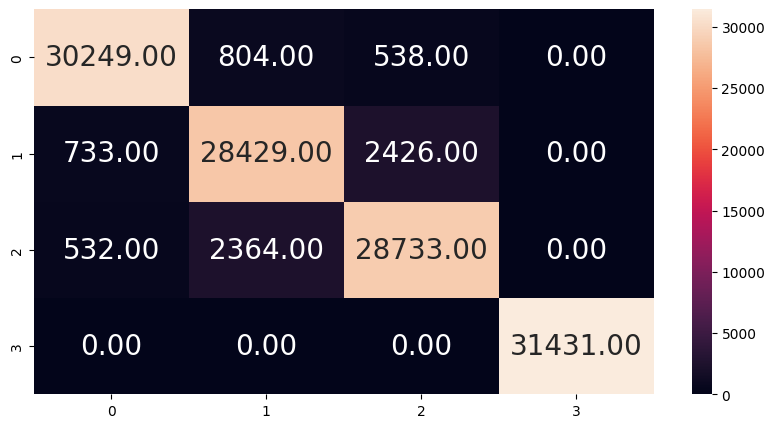

In [50]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

# *Decision Tree*

In [68]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
y_pred = dt.predict(x_train)
acc_dt = accuracy_score(y_train,y_pred)
ps_dt = precision_score(y_train,y_pred,average = "micro")
rs_dt = recall_score(y_train,y_pred, average = "micro")
f1_dt = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_dt}")
print(f"Precision Score = {ps_dt}")
print(f"Recall Score = {rs_dt}")
print(f"F1 Score = {f1_dt}")

Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
F1 Score = 1.0


In [70]:
y_pred = dt.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred)
ps_dt = precision_score(y_test,y_pred,average = "micro")
rs_dt = recall_score(y_test,y_pred, average = "micro")
f1_dt = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_dt}")
print(f"Precision Score = {ps_dt}")
print(f"Recall Score = {rs_dt}")
print(f"F1 Score = {f1_dt}")

Accuracy Score = 0.9418880060836984
Precision Score = 0.9418880060836984
Recall Score = 0.9418880060836984
F1 Score = 0.9418880060836984


Here is the confusion matrix of the model 
 
 [[30244   816   531     0]
 [  731 28483  2374     0]
 [  524  2360 28745     0]
 [    0     0     0 31431]]


<Axes: >

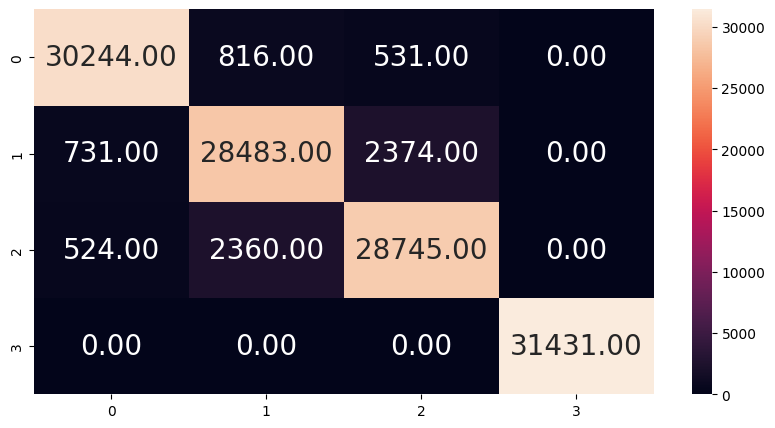

In [71]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

# *Naive Bayes*

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [65]:
y_pred = nb.predict(x_train)
acc_nb = accuracy_score(y_train,y_pred)
ps_nb = precision_score(y_train,y_pred,average = "micro")
rs_nb = recall_score(y_train,y_pred, average = "micro")
f1_nb = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_nb}")
print(f"Precision Score = {ps_nb}")
print(f"Recall Score = {rs_nb}")
print(f"F1 Score = {f1_nb}")

Accuracy Score = 0.6855277586341523
Precision Score = 0.6855277586341523
Recall Score = 0.6855277586341523
F1 Score = 0.6855277586341523


In [66]:
y_pred = nb.predict(x_test)
acc_nb = accuracy_score(y_test,y_pred)
ps_nb = precision_score(y_test,y_pred,average = "micro")
rs_nb = recall_score(y_test,y_pred, average = "micro")
f1_nb = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_nb}")
print(f"Precision Score = {ps_nb}")
print(f"Recall Score = {rs_nb}")
print(f"F1 Score = {f1_nb}")

Accuracy Score = 0.683647684154659
Precision Score = 0.683647684154659
Recall Score = 0.683647684154659
F1 Score = 0.683647684154659


Here is the confusion matrix of the model 
 
 [[22146  7129  2316     0]
 [ 2505 27904  1179     0]
 [ 6828 19979  4822     0]
 [    0     0     0 31431]]


<Axes: >

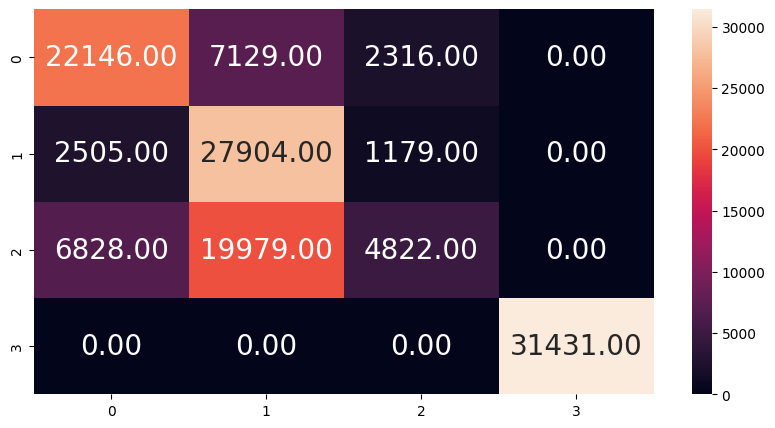

In [67]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**Gradient boosting**

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [93]:
y_pred = gbc.predict(x_train)
acc_gbc = accuracy_score(y_train,y_pred)
ps_gbc = precision_score(y_train,y_pred,average = "micro")
rs_gbc = recall_score(y_train,y_pred, average = "micro")
f1_gbc = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_gbc}")
print(f"Precision Score = {acc_gbc}")
print(f"Recall Score = {acc_gbc}")
print(f"F1 Score = {acc_gbc}")

Accuracy Score = 0.9229147499465299
Precision Score = 0.9229147499465299
Recall Score = 0.9229147499465299
F1 Score = 0.9229147499465299


In [94]:
y_pred = gbc.predict(x_test)
acc_gbc = accuracy_score(y_test,y_pred)
ps_gbc = precision_score(y_test,y_pred,average = "micro")
rs_gbc = recall_score(y_test,y_pred, average = "micro")
f1_gbc = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_gbc}")
print(f"Precision Score = {acc_gbc}")
print(f"Recall Score = {acc_gbc}")
print(f"F1 Score = {acc_gbc}")

Accuracy Score = 0.9211654084712332
Precision Score = 0.9211654084712332
Recall Score = 0.9211654084712332
F1 Score = 0.9211654084712332


Here is the confusion matrix of the model 
 
 [[30577   288   726     0]
 [ 1244 26709  3635     0]
 [ 1178  2881 27570     0]
 [    0     0     0 31431]]


<Axes: >

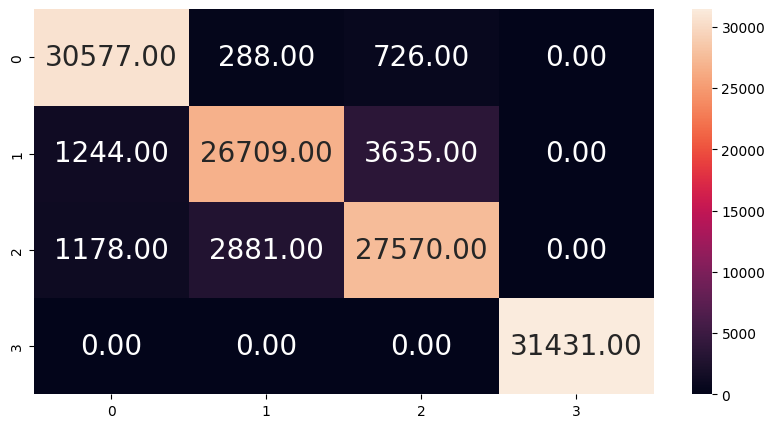

In [95]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**Adaboost**

In [96]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [97]:
y_pred = adb.predict(x_train)
acc_adb = accuracy_score(y_train,y_pred)
ps_adb = precision_score(y_train,y_pred,average = "micro")
rs_adb = recall_score(y_train,y_pred, average = "micro")
f1_adb = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_adb}")
print(f"Precision Score = {acc_adb}")
print(f"Recall Score = {acc_adb}")
print(f"F1 Score = {acc_adb}")

Accuracy Score = 0.8196647847445486
Precision Score = 0.8196647847445486
Recall Score = 0.8196647847445486
F1 Score = 0.8196647847445486


In [98]:
y_pred = adb.predict(x_test)
acc_adb = accuracy_score(y_test,y_pred)
ps_adb = precision_score(y_test,y_pred,average = "micro")
rs_adb = recall_score(y_test,y_pred, average = "micro")
f1_adb = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_adb}")
print(f"Precision Score = {acc_adb}")
print(f"Recall Score = {acc_adb}")
print(f"F1 Score = {acc_adb}")

Accuracy Score = 0.8193189109546178
Precision Score = 0.8193189109546178
Recall Score = 0.8193189109546178
F1 Score = 0.8193189109546178


Here is the confusion matrix of the model 
 
 [[23555     0  8036     0]
 [    0 16815 14773     0]
 [    0     0 31629     0]
 [    0     0     0 31431]]


<Axes: >

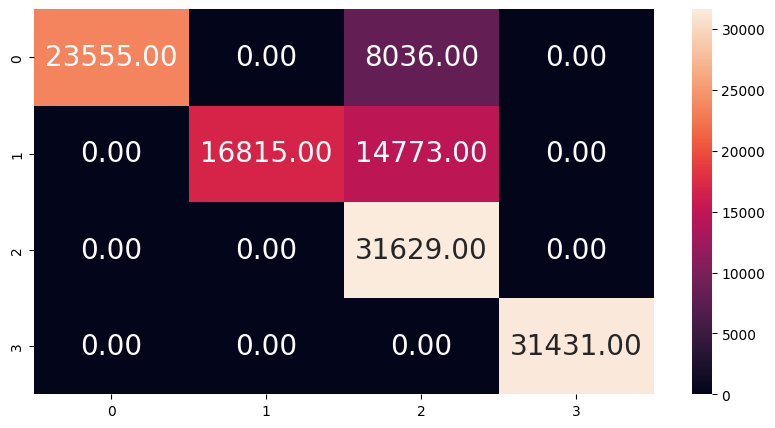

In [99]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**Catboost classifier**

In [100]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)

Learning rate set to 0.105743
0:	learn: 1.1680882	total: 536ms	remaining: 8m 55s
1:	learn: 1.0217919	total: 697ms	remaining: 5m 47s
2:	learn: 0.9109829	total: 853ms	remaining: 4m 43s
3:	learn: 0.8244339	total: 993ms	remaining: 4m 7s
4:	learn: 0.7536304	total: 1.14s	remaining: 3m 47s
5:	learn: 0.6937463	total: 1.26s	remaining: 3m 28s
6:	learn: 0.6441165	total: 1.37s	remaining: 3m 14s
7:	learn: 0.6017879	total: 1.51s	remaining: 3m 6s
8:	learn: 0.5654632	total: 1.63s	remaining: 2m 59s
9:	learn: 0.5343796	total: 1.76s	remaining: 2m 54s
10:	learn: 0.5053737	total: 1.88s	remaining: 2m 49s
11:	learn: 0.4816125	total: 1.99s	remaining: 2m 43s
12:	learn: 0.4597453	total: 2.12s	remaining: 2m 40s
13:	learn: 0.4391579	total: 2.23s	remaining: 2m 37s
14:	learn: 0.4223476	total: 2.36s	remaining: 2m 35s
15:	learn: 0.4066944	total: 2.49s	remaining: 2m 32s
16:	learn: 0.3922663	total: 2.65s	remaining: 2m 33s
17:	learn: 0.3800492	total: 2.75s	remaining: 2m 30s
18:	learn: 0.3678879	total: 2.87s	remaining: 2

In [101]:
y_pred = cat.predict(x_train)
acc_cat = accuracy_score(y_train,y_pred)
ps_cat = precision_score(y_train,y_pred,average = "micro")
rs_cat = recall_score(y_train,y_pred, average = "micro")
f1_cat = f1_score(y_train,y_pred, average = "micro")

print(f"Accuracy Score = {acc_cat}")
print(f"Precision Score = {acc_cat}")
print(f"Recall Score = {acc_cat}")
print(f"F1 Score = {acc_cat}")

Accuracy Score = 0.95250155317986
Precision Score = 0.95250155317986
Recall Score = 0.95250155317986
F1 Score = 0.95250155317986


In [102]:
y_pred = cat.predict(x_test)
acc_cat = accuracy_score(y_test,y_pred)
ps_cat = precision_score(y_test,y_pred,average = "micro")
rs_cat = recall_score(y_test,y_pred, average = "micro")
f1_cat = f1_score(y_test,y_pred, average = "micro")

print(f"Accuracy Score = {acc_cat}")
print(f"Precision Score = {acc_cat}")
print(f"Recall Score = {acc_cat}")
print(f"F1 Score = {acc_cat}")

Accuracy Score = 0.949056947536023
Precision Score = 0.949056947536023
Recall Score = 0.949056947536023
F1 Score = 0.949056947536023


Here is the confusion matrix of the model 
 
 [[30854   221   516     0]
 [  978 28424  2186     0]
 [  558  1972 29099     0]
 [    0     0     0 31431]]


<Axes: >

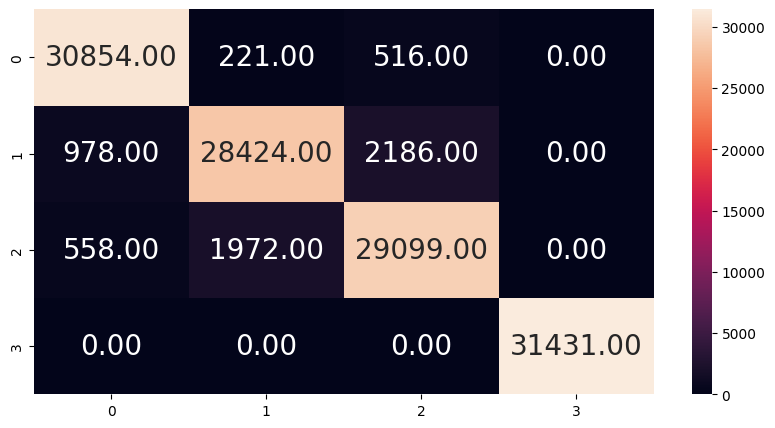

In [103]:
# confusion matrix of the model
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,y_pred)}')

# plot the confusion matrix for the model 
plt.figure(figsize=(10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

**LSTM**

In [104]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [105]:
# If your labels are integers (e.g., 0, 1, 2, 3), use LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)


In [106]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [108]:
# Build the LSTM model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(units=64, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False))

# Add Dropout for regularization
model.add(Dropout(0.2))

# Add a Dense layer with softmax activation for classification (4 classes)
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/20


4603/4603 [==============================] - 23s 4ms/step - loss: 0.4710 - accuracy: 0.7876 - val_loss: 0.3186 - val_accuracy: 0.8418
Epoch 2/20
4603/4603 [==============================] - 16s 4ms/step - loss: 0.3339 - accuracy: 0.8370 - val_loss: 0.2880 - val_accuracy: 0.8594
Epoch 3/20
4603/4603 [==============================] - 18s 4ms/step - loss: 0.4660 - accuracy: 0.7942 - val_loss: 0.2896 - val_accuracy: 0.8555
Epoch 4/20
4603/4603 [==============================] - 18s 4ms/step - loss: 0.3204 - accuracy: 0.8414 - val_loss: 0.2768 - val_accuracy: 0.8571
Epoch 5/20
4603/4603 [==============================] - 20s 4ms/step - loss: 0.3097 - accuracy: 0.8461 - val_loss: 0.2689 - val_accuracy: 0.8624
Epoch 6/20
4603/4603 [==============================] - 16s 3ms/step - loss: 0.3655 - accuracy: 0.8321 - val_loss: 0.3721 - val_accuracy: 0.8492
Epoch 7/20
4603/4603 [==============================] - 18s 4ms/step - loss: 0.5704 - accuracy: 0.7732 - val_loss: 0.2922 - val_

In [109]:
# Evaluate the model on the train data
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

Train Accuracy: 87.14%


In [110]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 87.02%


In [111]:
# Make predictions
y_pred = model.predict(x_test)

# Convert predictions and true values back to label format (not one-hot encoded)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true_labels, y_pred_labels))

# Print accuracy score
print(f'Accuracy: {accuracy_score(y_true_labels, y_pred_labels) * 100:.2f}%')

3945/3945 [==============================] - 6s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     31591
           1       0.91      0.70      0.79     31588
           2       0.72      0.89      0.80     31629
           3       1.00      1.00      1.00     31431

    accuracy                           0.87    126239
   macro avg       0.88      0.87      0.87    126239
weighted avg       0.88      0.87      0.87    126239

Accuracy: 87.02%


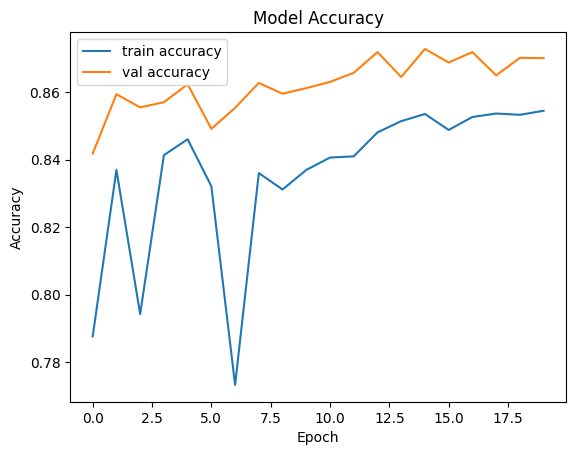

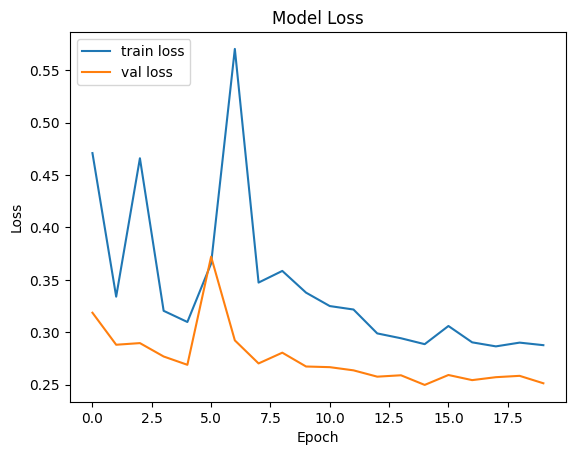

In [112]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [113]:
# Save the model to an H5 file
model.save('LSTM_Model.h5')

C:\Users\0819\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Prediction**

In [166]:
x_test.head()

,Message_ID,Byte_1,Byte_2,Byte_4,Byte_5,Byte_6,Byte_7,Byte_8,Signal_2
163048,7.140662e+01,356,0,8,0.0,8.0,0.0,0.0,0.0
1952933,1.002217e+02,1200,0,8,0.0,0.0,0.0,0.0,0.0
2383904,1.481193e+09,128,0,8,0.0,23.0,88.0,10.0,19.0
2287628,2.990498e+02,339,0,8,0.0,161.0,32.0,255.0,255.0
904075,9.510977e+02,357,0,8,18.0,216.0,127.0,0.0,0.0


In [167]:
y_test.head()

163048     0
1952933    2
2383904    3
2287628    2
904075     0
Name: Target, dtype: int64

In [169]:
Data = x_test
Data["Target"] = y_test

# Save the DataFrame to a CSV file
Data.to_csv("Testing.csv", index=False)

In [186]:
# Define the feature names (these should match the feature names you used during training)
feature_names = ['Message_ID','Byte_1', 'Byte_2', 'Byte_4', 'Byte_5', 'Byte_6', 'Byte_7', 'Byte_8', 'Signal_2']

# Input data
inp = [[1481192915.05, 128, 0, 8, 0, 23, 88, 10, 19]]

# Convert inp into a DataFrame with feature names
inp_df = pd.DataFrame(inp, columns=feature_names)

# Make predictions using the trained models
print(rf.predict(inp_df))    # RandomForest
print(gbc.predict(inp_df))   # GradientBoosting
print(adb.predict(inp_df))   # AdaBoost
print(cat.predict(inp_df))   # CatBoost

[3]
[3]
[3]
[[3]]


In [185]:
# Define the feature names (these should match the feature names you used during training)
feature_names = ['Message_ID','Byte_1', 'Byte_2', 'Byte_4', 'Byte_5', 'Byte_6', 'Byte_7', 'Byte_8', 'Signal_2']

# Input data
inp = [[299.049779, 339, 0, 8, 0, 161, 32, 255, 255]]

# Convert inp into a DataFrame with feature names
inp_df = pd.DataFrame(inp, columns=feature_names)

# Make predictions using the trained models
print(rf.predict(inp_df))    # RandomForest
print(gbc.predict(inp_df))   # GradientBoosting
print(adb.predict(inp_df))   # AdaBoost
print(cat.predict(inp_df))   # CatBoost

[2]
[2]
[2]
[[2]]


In [184]:
# Define the feature names (these should match the feature names you used during training)
feature_names = ['Message_ID','Byte_1', 'Byte_2', 'Byte_4', 'Byte_5', 'Byte_6', 'Byte_7', 'Byte_8', 'Signal_2']

# Input data
inp = [[951.097697, 357, 0, 8, 18, 216, 127, 0, 0]]

# Convert inp into a DataFrame with feature names
inp_df = pd.DataFrame(inp, columns=feature_names)

# Make predictions using the trained models
print(rf.predict(inp_df))    # RandomForest
print(gbc.predict(inp_df))   # GradientBoosting
print(adb.predict(inp_df))   # AdaBoost
print(cat.predict(inp_df))   # CatBoost

[0]
[0]
[0]
[[0]]


In [183]:
# Define the feature names (these should match the feature names you used during training)
feature_names = ['Message_ID','Byte_1', 'Byte_2', 'Byte_4', 'Byte_5', 'Byte_6', 'Byte_7', 'Byte_8', 'Signal_2']

# Input data
inp = [[57.424625, 608, 0, 8, 5, 25, 0, 48, 139]]

# Convert inp into a DataFrame with feature names
inp_df = pd.DataFrame(inp, columns=feature_names)

# Make predictions using the trained models
print(rf.predict(inp_df))    # RandomForest
print(gbc.predict(inp_df))   # GradientBoosting
print(adb.predict(inp_df))   # AdaBoost
print(cat.predict(inp_df))   # CatBoost

[1]
[1]
[2]
[[1]]


### **Graph**

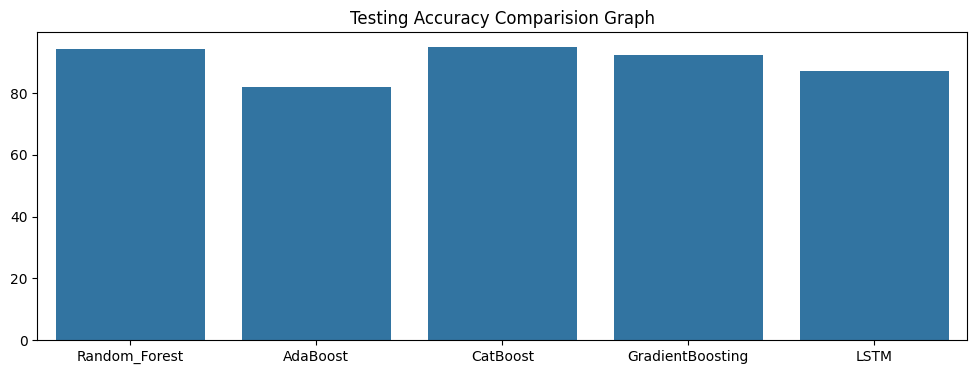

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

Algorithm = ["Random_Forest", "AdaBoost", "CatBoost", "GradientBoosting","LSTM"]
Accuracy = [acc_rf*100, acc_adb*100, acc_cat*100, acc_gbc*100,87.02]

plt.figure(figsize=(12,4))
sns.barplot(x = Algorithm, y = Accuracy)
plt.title("Testing Accuracy Comparision Graph")
plt.show()

In [188]:
import plotly.express as px

# Data for the plot
Algorithm = ["Random_Forest", "AdaBoost", "CatBoost", "GradientBoosting", "LSTM"]
Accuracy = [acc_rf*100, acc_adb*100, acc_cat*100, acc_gbc*100, 87.02]

# Create a DataFrame for Plotly (optional, but helps with organization)
import pandas as pd
data = pd.DataFrame({
    'Algorithm': Algorithm,
    'Accuracy': Accuracy
})

# Create an interactive bar plot
fig = px.bar(data, 
             x='Algorithm', 
             y='Accuracy',
             color='Accuracy',  # Color bars based on accuracy
             hover_data={'Algorithm': True, 'Accuracy': True},  # Show accuracy on hover
             labels={'Accuracy': 'Testing Accuracy (%)'},  # Label for the y-axis
             title='Testing Accuracy Comparison')

# Show the plot
fig.show()
